In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")


In [10]:
import pickle

df = pd.read_csv("Sugar.csv")
l = df['Month'].values

In [11]:
with open("dates.txt", "wb") as fp:   #Pickling
    pickle.dump(l, fp)

In [12]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index('Month')
df.head()

,Price
Month,
2012-01-01,55.75
2012-02-01,54.29
2012-03-01,58.45
2012-04-01,58.75
2012-05-01,58.30


In [13]:
train, test = df[:-12], df[-12:]

In [14]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [15]:
n_input = 12
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input)

model = Sequential()
model.add(LSTM(700, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.10))
model.add(Dense(1))
model.compile(optimizer='adam', loss="mse")

model.fit_generator(generator, epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.1641
Epoch 2/300
1/1 [==============================] - 0s 53ms/step - loss: 0.1223
Epoch 3/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0884
Epoch 4/300
1/1 [==============================] - 0s 30ms/step - loss: 0.0562
Epoch 5/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0333
Epoch 6/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0505
Epoch 7/300
1/1 [==============================] - 0s 26ms/step - loss: 0.0482
Epoch 8/300
1/1 [==============================] - 0s 27ms/step - loss: 0.0341
Epoch 9/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0291
Epoch 10/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0319
Epoch 11/300
1/1 [==============================] - 0s 27ms/step - loss: 0.0336
Epoch 12/300
1/1 [==============================] - 0s 27ms/step - loss: 0.0363
Epoch 13/300
1/1 [==============================] -

Epoch 104/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0085
Epoch 105/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0090
Epoch 106/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0095
Epoch 107/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0092
Epoch 108/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0082
Epoch 109/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0102
Epoch 110/300
1/1 [==============================] - 0s 29ms/step - loss: 0.0084
Epoch 111/300
1/1 [==============================] - 0s 29ms/step - loss: 0.0086
Epoch 112/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0082
Epoch 113/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0080
Epoch 114/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0072
Epoch 115/300
1/1 [==============================] - 0s 28ms/step - loss: 0.0067
Epoch 116/300
1/1 [=========

Epoch 206/300
1/1 [==============================] - 0s 25ms/step - loss: 0.0040
Epoch 207/300
1/1 [==============================] - 0s 38ms/step - loss: 0.0039
Epoch 208/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0036
Epoch 209/300
1/1 [==============================] - 0s 28ms/step - loss: 0.0041
Epoch 210/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0041
Epoch 211/300
1/1 [==============================] - 0s 26ms/step - loss: 0.0035
Epoch 212/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0039
Epoch 213/300
1/1 [==============================] - 0s 28ms/step - loss: 0.0034
Epoch 214/300
1/1 [==============================] - 0s 30ms/step - loss: 0.0044
Epoch 215/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0039
Epoch 216/300
1/1 [==============================] - 0s 25ms/step - loss: 0.0039
Epoch 217/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0042
Epoch 218/300
1/1 [=========

In [7]:
pred_list = []

batch = train[-n_input:].reshape((1,n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

In [8]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=df[-n_input:].index, columns=['Predictions'])

df_test = pd.concat([df, df_predict], axis=1)

df_test.tail(12)

,Price,Predictions
Month,,
2018-08-01,60.50,61.936174
2018-09-01,60.50,61.362920
2018-10-01,60.50,60.403077
2018-11-01,60.50,59.006113
2018-12-01,61.00,57.951463
2019-01-01,64.00,57.378326
2019-02-01,64.63,57.555297
2019-03-01,64.86,58.233975
2019-04-01,70.39,59.389136


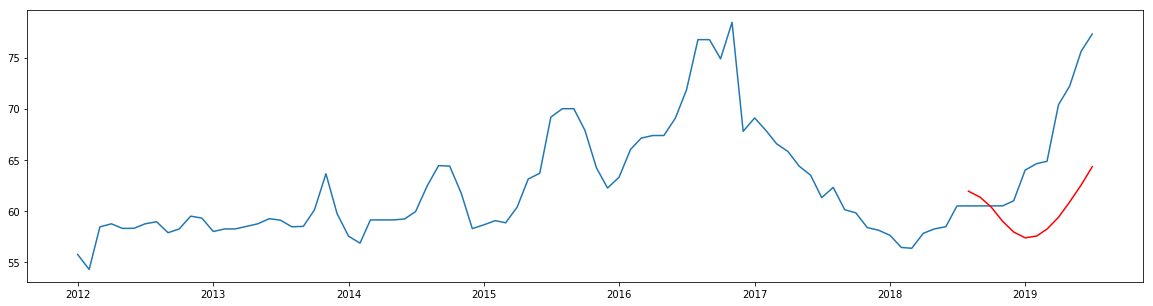

In [9]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Price'])
plt.plot(df_test.index, df_test['Predictions'], color='r')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(test,pred_list)

0.10578035778587332

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(scaler.inverse_transform(test), scaler.inverse_transform(pred_list)) 

6.301665866797172